In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel('../data/data_num_325_correct.xlsx')
del data['样本编号']
del data['时间']
lable = data['Product_RON_loss']
del data['Product_RON_loss']
data_raw = data.copy()

In [3]:
lable

0      1.38
1      1.18
2      1.38
3      1.38
4      1.28
       ... 
320    1.15
321    1.25
322    1.35
323    1.28
324    1.25
Name: Product_RON_loss, Length: 325, dtype: float64

In [4]:
columns = data.columns.values.tolist()

In [5]:
#数据整定（1）对于只含有部分时间点的位点，如果其残缺数据较多，无法补充，将此类位点删除
data_zero = pd.DataFrame((data == 0).sum())
data_zero.columns = ['Zero_num']
data_zero.sort_values('Zero_num', inplace = True, ascending = False)
data_zero['Zero_Percent'] = data_zero['Zero_num'].map(lambda x : x / len(columns))
data_zero = data_zero.loc[data_zero['Zero_Percent'] >= 0.59]
data_zero

,Zero_num,Zero_Percent
S-ZORB.FT_1502.DACA,308,0.839237
S-ZORB.FC_1104.DACA,307,0.836512
S-ZORB.FT_2803.DACA,297,0.809264
S-ZORB.FT_1501.PV,288,0.784741
S-ZORB.FC_1202.PV,219,0.596730


In [6]:
data_zero.index.values.tolist()
data_zero_index = data_zero.index.values.tolist()

In [7]:
data_zero_index

['S-ZORB.FT_1502.DACA',
 'S-ZORB.FC_1104.DACA',
 'S-ZORB.FT_2803.DACA',
 'S-ZORB.FT_1501.PV',
 'S-ZORB.FC_1202.PV']

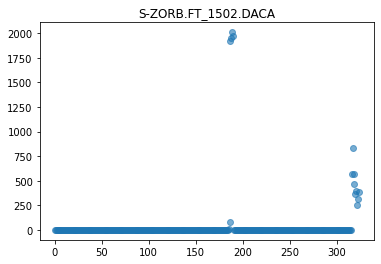

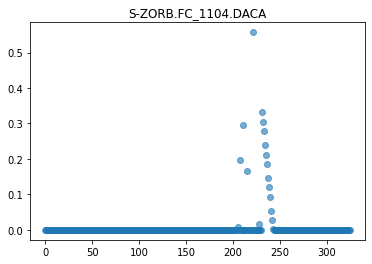

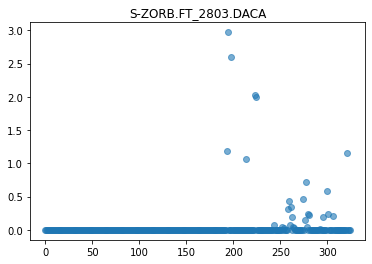

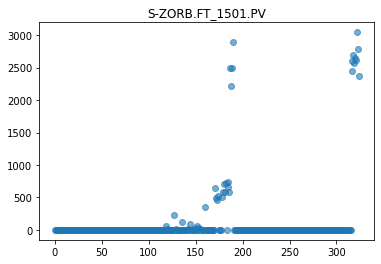

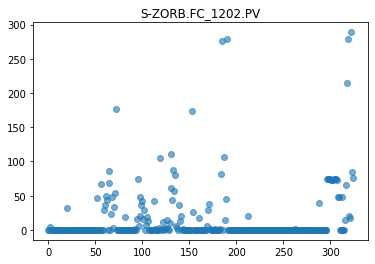

In [8]:
for i in range(0,len(data_zero_index)):
    x = np.arange(len(data[data_zero_index[i]]))
    y = data[data_zero_index[i]]
    title = data_zero_index[i]
    plt.title(title)
    plt.scatter(x, y, alpha=0.6)  # 绘制散点图
    plt.show()

(array([1, 2, 3, 4, 5]),
 [Text(1, 0, 'S-ZORB.FT_1502.DACA'),
  Text(2, 0, 'S-ZORB.FC_1104.DACA'),
  Text(3, 0, 'S-ZORB.FT_2803.DACA'),
  Text(4, 0, 'S-ZORB.FT_1501.PV'),
  Text(5, 0, 'S-ZORB.FC_1202.PV')])

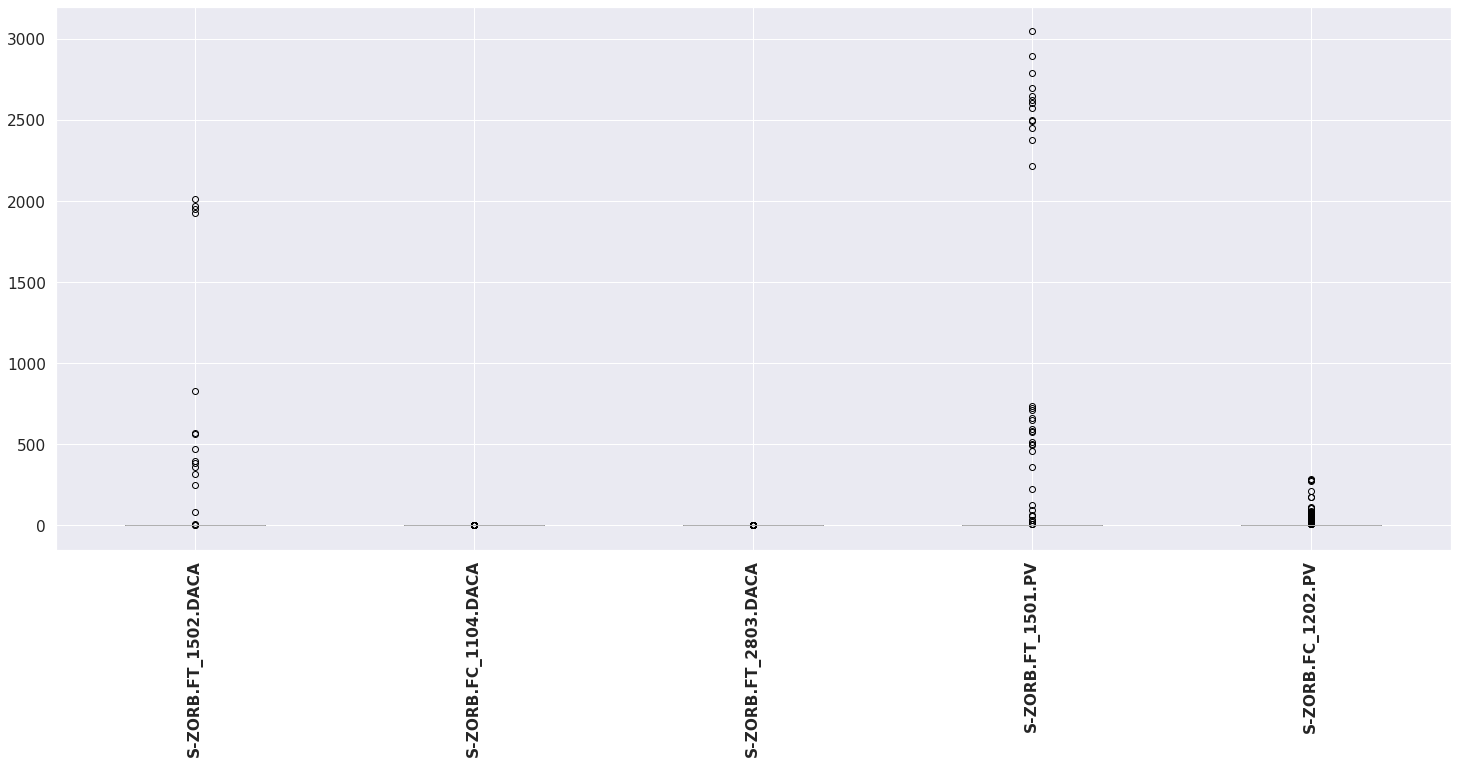

In [9]:

plt.figure(figsize=(25,10))
sb.set(font_scale=1.4)
data.boxplot(column = data_zero.index.values.tolist())
plt.xticks(weight='bold',rotation=90)

In [10]:
data.drop(columns = data_zero.T.columns.values.tolist(), inplace = True)
data.describe()

,Raw_S_content,Raw_RON,Raw_Saturated_hydrocarbon,Raw_Olefins,Raw_Aromatics,Raw_Bromine_value,Raw_Density,Product_S_content,Product_RON,Spent_C,...,S-ZORB.CAL_1.CANGLIANG.PV,S-ZORB.FT_1006.DACA.PV,S-ZORB.FT_5204.DACA.PV,S-ZORB.FT_1006.TOTALIZERA.PV,S-ZORB.FT_5204.TOTALIZERA.PV,S-ZORB.FT_1503.DACA.PV,S-ZORB.FT_1503.TOTALIZERA.PV,S-ZORB.FT_1504.DACA.PV,S-ZORB.FT_1504.TOTALIZERA.PV,S-ZORB.PC_1001A.PV
count,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,...,325.000000,325.000000,325.000000,3.250000e+02,3.250000e+02,3.250000e+02,3.250000e+02,325.000000,3.250000e+02,325.000000
mean,229.548904,89.701538,52.676228,25.389298,21.931659,53.988808,726.755265,4.058154,88.446769,3.180518,...,2.256077,4843.993930,180.358341,6.719406e+07,1.113469e+06,9.008195e+04,1.521126e+07,2105.079943,1.760142e+07,-33.277532
std,65.752227,0.950064,4.584314,4.954857,1.853239,8.164930,4.262181,1.551175,0.984739,1.998207,...,0.275891,2359.134691,253.214716,3.861360e+07,1.169934e+06,5.754798e+05,1.060279e+07,1798.246718,1.172462e+07,42.008897
min,57.000000,85.300000,43.240000,14.600000,16.000000,6.390000,715.100000,3.200000,85.100000,1.010000,...,1.271312,0.000000,0.000000,0.000000e+00,3.050138e+04,6.156109e+01,0.000000e+00,-13900.460500,0.000000e+00,-120.560473
25%,185.000000,89.200000,49.610000,21.800000,20.690000,48.650000,724.200000,3.200000,87.900000,1.850000,...,2.080581,4215.424100,0.000000,3.272797e+07,3.518756e+04,1.870588e+03,6.520788e+06,2211.859850,7.974892e+06,-72.834572
50%,240.285714,89.800000,53.250000,24.800000,21.890000,53.980000,726.300000,3.200000,88.600000,2.390000,...,2.247015,5094.966775,142.936557,7.252226e+07,3.631831e+05,2.177558e+03,1.381849e+07,2538.538450,1.643785e+07,0.293821
75%,271.428571,90.300000,56.100000,29.000000,23.300000,60.190000,729.500000,4.400000,89.100000,3.820000,...,2.338828,6129.741900,217.985505,1.017919e+08,2.545050e+06,2.569868e+03,2.254427e+07,2702.628700,2.678945e+07,0.350086
max,392.000000,91.700000,63.400000,34.670000,26.200000,70.500000,738.700000,11.800000,90.420000,12.150000,...,3.558827,11320.456750,2120.872650,1.236097e+08,2.562289e+06,5.419704e+06,3.906312e+07,3104.564825,3.960876e+07,0.358053


In [11]:
#删除325个样本中数据全部为空值的位点
data_zero_row = pd.DataFrame((data == 0).sum(axis = 1))
data_zero_row.columns = ['Zero_num']
data_zero_row.sort_values('Zero_num', inplace = True, ascending = False)
data_zero_row['Zero_Percent'] = data_zero_row['Zero_num'].map(lambda x : x / len(columns))
data_zero_row

,Zero_num,Zero_Percent
263,11,0.029973
224,10,0.027248
245,10,0.027248
141,10,0.027248
219,10,0.027248
...,...,...
43,3,0.008174
50,3,0.008174
83,2,0.005450
3,2,0.005450


In [12]:
data.describe()

,Raw_S_content,Raw_RON,Raw_Saturated_hydrocarbon,Raw_Olefins,Raw_Aromatics,Raw_Bromine_value,Raw_Density,Product_S_content,Product_RON,Spent_C,...,S-ZORB.CAL_1.CANGLIANG.PV,S-ZORB.FT_1006.DACA.PV,S-ZORB.FT_5204.DACA.PV,S-ZORB.FT_1006.TOTALIZERA.PV,S-ZORB.FT_5204.TOTALIZERA.PV,S-ZORB.FT_1503.DACA.PV,S-ZORB.FT_1503.TOTALIZERA.PV,S-ZORB.FT_1504.DACA.PV,S-ZORB.FT_1504.TOTALIZERA.PV,S-ZORB.PC_1001A.PV
count,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,...,325.000000,325.000000,325.000000,3.250000e+02,3.250000e+02,3.250000e+02,3.250000e+02,325.000000,3.250000e+02,325.000000
mean,229.548904,89.701538,52.676228,25.389298,21.931659,53.988808,726.755265,4.058154,88.446769,3.180518,...,2.256077,4843.993930,180.358341,6.719406e+07,1.113469e+06,9.008195e+04,1.521126e+07,2105.079943,1.760142e+07,-33.277532
std,65.752227,0.950064,4.584314,4.954857,1.853239,8.164930,4.262181,1.551175,0.984739,1.998207,...,0.275891,2359.134691,253.214716,3.861360e+07,1.169934e+06,5.754798e+05,1.060279e+07,1798.246718,1.172462e+07,42.008897
min,57.000000,85.300000,43.240000,14.600000,16.000000,6.390000,715.100000,3.200000,85.100000,1.010000,...,1.271312,0.000000,0.000000,0.000000e+00,3.050138e+04,6.156109e+01,0.000000e+00,-13900.460500,0.000000e+00,-120.560473
25%,185.000000,89.200000,49.610000,21.800000,20.690000,48.650000,724.200000,3.200000,87.900000,1.850000,...,2.080581,4215.424100,0.000000,3.272797e+07,3.518756e+04,1.870588e+03,6.520788e+06,2211.859850,7.974892e+06,-72.834572
50%,240.285714,89.800000,53.250000,24.800000,21.890000,53.980000,726.300000,3.200000,88.600000,2.390000,...,2.247015,5094.966775,142.936557,7.252226e+07,3.631831e+05,2.177558e+03,1.381849e+07,2538.538450,1.643785e+07,0.293821
75%,271.428571,90.300000,56.100000,29.000000,23.300000,60.190000,729.500000,4.400000,89.100000,3.820000,...,2.338828,6129.741900,217.985505,1.017919e+08,2.545050e+06,2.569868e+03,2.254427e+07,2702.628700,2.678945e+07,0.350086
max,392.000000,91.700000,63.400000,34.670000,26.200000,70.500000,738.700000,11.800000,90.420000,12.150000,...,3.558827,11320.456750,2120.872650,1.236097e+08,2.562289e+06,5.419704e+06,3.906312e+07,3104.564825,3.960876e+07,0.358053


In [13]:
#对于部分数据为空值的位点，空值处用其前后两天数据的平均值代替
data_inplace_zero = pd.DataFrame((data == 0).sum())
data_inplace_zero.columns = ['Zero_num']

In [14]:
data_inplace_zero.sort_values('Zero_num', inplace = True, ascending = False)
columns_inplace = data_inplace_zero[data_inplace_zero['Zero_num'] > 0].index
columns_inplace

Index(['S-ZORB.FC_3103.PV', 'S-ZORB.TEX_3103A.DACA', 'S-ZORB.FT_1002.TOTAL',
       'S-ZORB.FC_2301.PV', 'S-ZORB.FT_2901.DACA', 'S-ZORB.FT_1002.PV',
       'S-ZORB.FT_9101.PV', 'S-ZORB.FT_5102.DACA.PV', 'S-ZORB.FT_5104.PV',
       'S-ZORB.FT_1501.TOTAL', 'S-ZORB.FT_5102.PV', 'S-ZORB.FT_5204.DACA.PV',
       'S-ZORB.FT_3702.DACA', 'S-ZORB.FT_1006.DACA.PV', 'S-ZORB.FT_2002.DACA',
       'S-ZORB.FT_1004.PV', 'S-ZORB.FT_1006.TOTALIZERA.PV',
       'S-ZORB.FT_2303.DACA', 'S-ZORB.FT_1003.PV', 'S-ZORB.FT_9301.PV',
       'S-ZORB.FT_2302.DACA', 'S-ZORB.FT_3303.DACA', 'S-ZORB.FC_2432.DACA',
       'S-ZORB.FC_2432.PIDA.SP', 'S-ZORB.FT_1503.TOTALIZERA.PV',
       'S-ZORB.FT_1504.TOTALIZERA.PV', 'S-ZORB.FT_9402.PV'],
      dtype='object')

In [15]:
for i in range(1, len(columns_inplace)):
    for j in range(1, 325-1):
        if(data[columns_inplace[i]][j] == 0):
            data[columns_inplace[i]][j] = (data[columns_inplace[i]][j - 1] + data[columns_inplace[i]][j + 1]) / 2

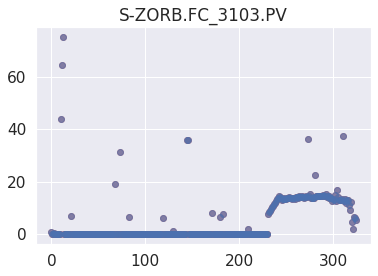

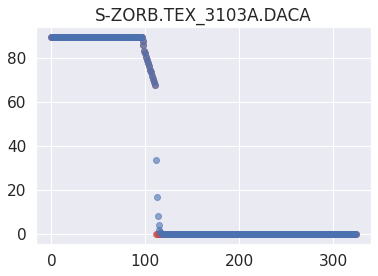

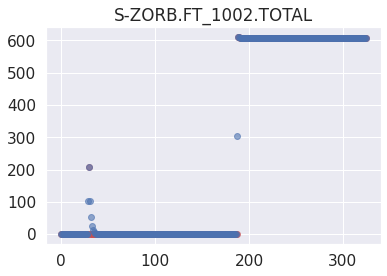

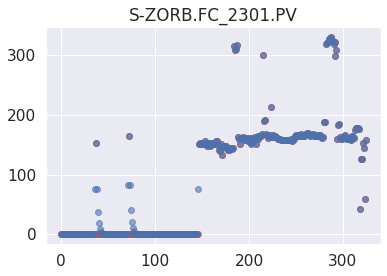

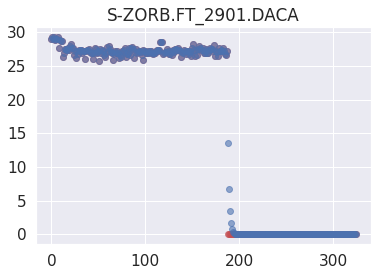

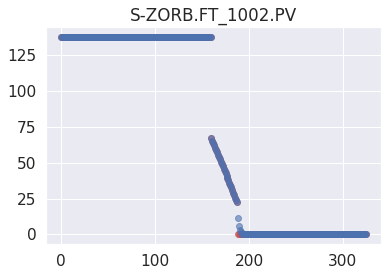

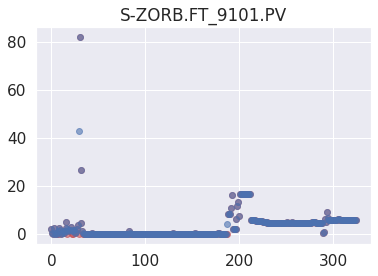

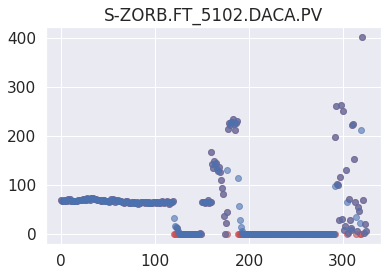

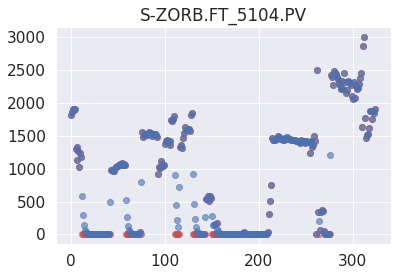

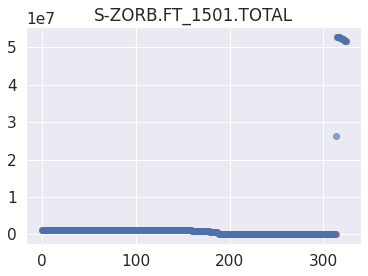

In [16]:
for i in range(0,10):
    x = np.arange(len(data[columns_inplace[i]]))
    y1 = data_raw[columns_inplace[i]]
    y2 = data[columns_inplace[i]]
    title = columns_inplace[i]
    plt.title(title)
    plt.scatter(x, y1, c = 'r',alpha=0.6)  # 绘制散点图
    plt.scatter(x, y2, c = 'b', alpha=0.6)
    plt.show()

In [18]:
data['Product_RON_loss'] = lable
data

,Raw_S_content,Raw_RON,Raw_Saturated_hydrocarbon,Raw_Olefins,Raw_Aromatics,Raw_Bromine_value,Raw_Density,Product_S_content,Product_RON,Spent_C,...,S-ZORB.FT_1006.DACA.PV,S-ZORB.FT_5204.DACA.PV,S-ZORB.FT_1006.TOTALIZERA.PV,S-ZORB.FT_5204.TOTALIZERA.PV,S-ZORB.FT_1503.DACA.PV,S-ZORB.FT_1503.TOTALIZERA.PV,S-ZORB.FT_1504.DACA.PV,S-ZORB.FT_1504.TOTALIZERA.PV,S-ZORB.PC_1001A.PV,Product_RON_loss
0,188.000000,90.6,53.230000,24.400000,22.370000,61.487143,726.085714,3.2,89.22,2.32,...,6368.74700,233.310805,83086802.00,832503.795,2.216409e+03,39063124.50,1840.14470,39608757.0,0.353271,1.38
1,169.000000,90.5,52.300000,26.400000,21.300000,61.880000,731.300000,3.2,89.32,2.37,...,6360.64530,242.369205,82318954.00,803462.665,2.370587e+03,38810581.50,1641.73260,39389299.0,0.354504,1.18
2,177.000000,90.7,52.300000,26.314286,21.385714,61.722857,729.614286,3.2,89.32,2.43,...,6504.96490,233.076925,82012004.00,791925.055,2.326465e+03,38693812.00,1600.67575,39312616.5,0.350181,1.38
3,159.000000,90.4,52.300000,26.100000,21.600000,61.330000,725.400000,3.2,89.02,3.08,...,6506.82495,238.349935,81231373.50,762863.810,2.495224e+03,38410862.50,1563.71215,39120204.5,0.353930,1.38
4,173.000000,89.6,52.242857,26.671429,21.085714,61.332857,725.428571,3.2,88.32,2.45,...,6560.24225,236.576220,80915707.50,751362.300,2.807789e+03,38283000.00,1554.35740,39045953.5,0.358053,1.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,271.428571,89.2,47.190000,31.300000,21.510000,52.020000,725.200000,3.2,88.05,9.45,...,8328.97475,150.441618,84087479.25,2136687.475,3.159956e+06,1569503.75,-7028.11670,1003276.5,-118.251153,1.15
321,271.428571,89.2,47.190000,31.300000,21.510000,52.020000,725.200000,3.2,87.95,9.09,...,8457.86080,148.748365,83687113.25,2129270.425,3.662122e+06,1521263.75,-8555.30420,879436.8,-118.764337,1.25
322,271.428571,89.4,47.190000,31.300000,21.510000,52.020000,725.200000,3.2,88.05,5.72,...,8246.20925,150.095445,83087625.75,2118469.700,4.415371e+06,1448903.75,-10846.08550,693676.8,-119.534108,1.35
323,266.000000,89.4,46.720000,33.780000,19.500000,45.450000,730.000000,3.6,88.12,4.33,...,7998.80235,149.533987,82696129.75,2110959.450,4.917538e+06,1400663.75,-12373.27275,569836.8,-120.047287,1.28


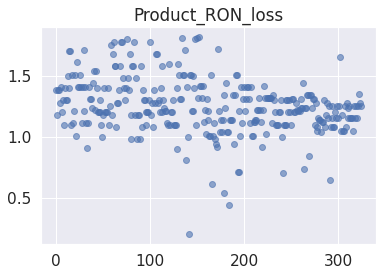

In [19]:
x = np.arange(len(data['Product_RON_loss']))
# y1 = data_raw[columns_inplace[i]]
y2 = data['Product_RON_loss']
title = 'Product_RON_loss'
plt.title(title)
# plt.scatter(x, y1, c = 'r',alpha=0.6)  # 绘制散点图
plt.scatter(x, y2, c = 'b', alpha=0.6)
plt.show()

In [20]:
data.to_excel('../data/data_preprocess_123.xlsx')